<a href="https://colab.research.google.com/github/elvissoares/EQE595-SimMol/blob/main/notebooks/2_Lennard-Jones_Cond_Contorno_Periodica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Prática 02 - Interação de Lennard-Jones e Condição de Contorno Periódica

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares)

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

In [ ]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt

## Interação de Lennard-Jones

Para duas partículas interagindo, o potencial de interação Lennard-Jones é dada por

$$u(r) = 4\epsilon\left[ \left(\frac{\sigma}{r} \right)^{12}-\left(\frac{\sigma}{r} \right)^{6}\right] $$

com
- $r$: distância entre partículas
- $\epsilon$: energia de interação atrativa;
- $\sigma$: distância de aproximação mínima.

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente a função que calcula a interação de LJ entre duas partículas

In [ ]:
def ulj(r,epsilon=1.0,sigma=1.0): # define função com valores default para epsilon e sigma

    return ...

In [ ]:
def ulj(r,epsilon=1.0,sigma=1.0):
    sigma_r_6 = (sigma/r)**6
    return 4*epsilon*(sigma_r_6**2-sigma_r_6)

Gráfico do potencial de interação

In [ ]:
r = np.arange(0.01,5,0.01)

plt.plot(r,ulj(r))
# limite dos eixos
plt.ylim(-1,1)
plt.xlim(0,5)

# nome dos eixos
plt.xlabel(r'$r$')
plt.ylabel(r'$u(r)$')

## 3 partículas interagindo

In [ ]:
# triângulo equilatero de tamanho l
l = 1.5

r1 = np.array([0.0,0.0]) # posição x e y
r2 = np.array([l,0.0])
r3 = np.array([l/2,l*np.sqrt(3)/2])

Gráfico das 3 partículas

In [ ]:
plt.figure(figsize=(5,5)) # faz com que a figura seja quadrada
plt.plot(r1[0],r1[1],'o',ms=10.0,alpha=0.5)
plt.plot(r2[0],r2[1],'o',ms=10.0,alpha=0.5)
plt.plot(r3[0],r3[1],'o',ms=10.0,alpha=0.5)

# plt.xlim(0,l)
# plt.ylim(0,l)

plt.xlabel('x')
plt.ylabel('y')

Calculando distâncias

In [ ]:
r2-r1

In [ ]:
np.linalg.norm(r2-r1)

In [ ]:
r3-r1

In [ ]:
np.linalg.norm(r3-r1)

In [ ]:
r3-r2

In [ ]:
np.linalg.norm(r3-r2)

Calculando energia entre pares

In [ ]:
u12 = ...

In [ ]:
u13 = ...

In [ ]:
u23 = ...

Energia total

In [ ]:
Utot = u12 + u13 + u23

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie uma função que distribua as 3 partículas num triângulo de lado $l$ e calcule a energia total de LJ

In [ ]:
def triangulo(l):

    return ...

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Varie o comprimento $l$ e determine qual o valor para que a energia total seja mínima

## Energia total de várias partículas

No caso de termos $N$ partículas, podemos calcular a energia total como sendo

$$U = \frac{1}{2}\sum_{i=1}^N \sum_{j \neq i}^N u(r_{ij})$$

com
- $r_{ij} = |\boldsymbol{r}_i - \boldsymbol{r}_j|$: distância entre as duas partículas



**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Mostre que para 3 partículas a energia total se reduz ao calculado no item anterior

## Partículas em uma rede quadrada 2D

Número de partículas

In [ ]:
Nparticles = 36

Tamanho da rede

In [ ]:
L = 10.0

Vamos distribuir as partículas de forma uniforme ao longo da caixa usando a função `meshgrid`

In [ ]:
# Número de pontos em x e y
Nx = int(np.sqrt(Nparticles))
Ny = int(np.sqrt(Nparticles))
# ou seja, Nx.Ny = Nparticles

# Espaçamento entre os átomos
dx = L/Nx
dy = L/Ny

# Posições possíveis em x e y
xarray = np.arange(0.5*dx,L,dx)
yarray = np.arange(0.5*dy,L,dy)

# Cria uma grid em 2D
X,Y = np.meshgrid(xarray,yarray,indexing='ij')

# Colocando as partículas em suas posições
x0 = X.flatten()
y0 = Y.flatten()

# Array com posições das partículas
r = np.zeros((Nparticles,2))
r[:,0] = x0
r[:,1] = y0

Figuras com as posições das partículas

In [ ]:
plt.figure(figsize=(5,5)) # faz com que a figura seja quadrada
plt.plot(r[:,0],r[:,1],'o',ms=10.0,alpha=0.5)

plt.xlim(0,L)
plt.ylim(0,L)

plt.xlabel('x')
plt.ylabel('y')

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie a função que calcula a interação entre todas as partículas da rede quadrada

In [ ]:
def interacao_total(r,epsilon=1.0,sigma=1.0):

    return ...

In [ ]:
def interacao_total(r,epsilon=1.0,sigma=1.0):
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            # calcula distancia entre duas particulas
            rij = np.linalg.norm(r[i]-r[j])
            # calcula energia interna
            U += ulj(rij,epsilon,sigma)
    return U

Valor da interação total

In [ ]:
interacao_total(r,epsilon=1.0,sigma=1.0)

## Raio de corte (cutoff)

Podemos definir uma distãncia máxima `rcut` (um cutoff) tal que a interação de LJ seja nula a partir dela, ou seja, $ u(r) = 0$ se $ r> r_\text{cut}$.

In [ ]:
rcut = 2.5

In [ ]:
def interacao_total_cutoff(r,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            # calcula distancia entre duas particulas
            rij = np.linalg.norm(r[i]-r[j])
            if rij < rcut:
                # calcula energia interna
                U += ulj(rij,epsilon,sigma)
    return U

Valor da interação com cutoff

In [ ]:
interacao_total_cutoff(r,epsilon=1.0,sigma=1.0)

## Condição de Contorno Períodica

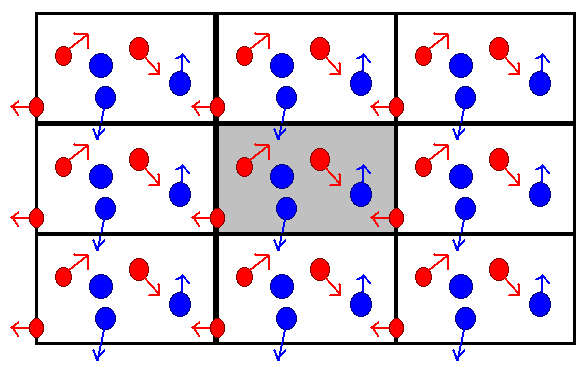

- Se x<0 faremos $ x = x + L$

- Se x>L faremos $ x = x- L$

In [ ]:
def pbc(x,L):
    if x < 0:
        xnew = x + L
    elif x > L:
        xnew = x - L
    else:
        xnew = x
    return xnew

In [ ]:
pbc(15.0,L) # fora da caixa pela direita

In [ ]:
pbc(-10.0,L) # fora da caixa pela esquerda

In [ ]:
pbc(5.0,L) # dentro da caixa

Função `rint` faz o mesmo trabalho

In [ ]:
15.0 - np.rint(15.0/L)*L

In [ ]:
-10.0 - np.rint(-10.0/L)*L

Incluindo a condição de contorno periódica

In [ ]:
def interacao_total_cutoff_pbc(r,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
    return U

In [ ]:
interacao_total_cutoff_pbc(r,epsilon=1.0,sigma=1.0,rcut=2.5)

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Crie uma função que calcule a energia do sistema mudando o tamanho da rede quadrada $L$;

> Faça um gráfico de $U$ como função de $L$

## Calculando Forças entre Partículas

Vamos calcular a força total que atua sobre a partícula $i$ a partir do gradiente da energia potencial

$$ \boldsymbol{F}_i = - \nabla_i U_{int} = - \frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{\partial r_{kj}}{\partial \boldsymbol{r}_i}=-\frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{(\delta_{ki}-\delta_{ij})(\boldsymbol{r}_k -\boldsymbol{r}_j)}{ |\boldsymbol{r}_k-\boldsymbol{r}_j|}$$

de modo que

$$ \boldsymbol{F}_i = -\sum_{j \neq i} \frac{\partial u(r_{ij})}{\partial r_{ij}} \frac{\boldsymbol{r}_{ij}}{ \boldsymbol{r}_{ij}}$$

com $\boldsymbol{r}_{ij} = \boldsymbol{r}_{i} - \boldsymbol{r}_{j}$ sendo o vetor posição relativa da partícula $i$ vista da partícula $j$.

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente a função que calcula a derivada do potencial de LJ:  $ \frac{\partial u(r)}{\partial r}$

In [ ]:
def duljdr(r,epsilon=1.0,sigma=1.0):
    return ...

In [ ]:
def duljdr(r,epsilon=1.0,sigma=1.0):
    return -4*epsilon*((12*(sigma/r)**12-6*(sigma/r)**6)/r)

Função que calcula energia e aceleração de LJ

In [ ]:
def lennardjones2d(r,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    a = np.zeros((Nparticles,2))
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
                # calcula a derivada do potencial
                dudr = duljdr(rij_norm,epsilon,sigma)
                # calcula aceleração na particula i
                a[i][0] += -dudr*rij[0]/rij_norm
                a[i][1] += -dudr*rij[1]/rij_norm
                # calcula aceleração na particula j usando 3ª Lei de Newton
                a[j][0] += dudr*rij[0]/rij_norm
                a[j][1] += dudr*rij[1]/rij_norm
    return U, a

In [ ]:
U,a = lennardjones2d(r)

U, a

## Especificando a partícula

**Ex:** Para Ar (argônio) temos
- $\sigma = 3,4\ \AA$
- $\epsilon/k_B = 119,8$ K

In [ ]:
sigma = 3.4 # em Angstrom
epsilon = 119.8 # em Kelvin

In [ ]:
U, a = ...

## Generalizando para 3D

Definindo o número de partículas

In [ ]:
Nparticles = 216

Colocando as partículas em posições numa rede cúbica

In [ ]:
def rede_cubica(Nparticles, L):
    # array como posições das partículas
    r = np.zeros((Nparticles,3))
    # Número de pontos em x e y
    Nx = Ny = Nz = int(np.ceil(np.power(Nparticles,1/3.0)))

    # Espaçamento entre os átomos
    dx = L/Nx
    dy = L/Ny
    dz = L/Nz

    # Posições possíveis em x e y
    id = 0
    for i in range(Nx):
        for j in range(Ny):
            for k in range(Nz):
                if (id < Nparticles):
                    r[id][0] = (i+0.5)*dx
                    r[id][1] = (j+0.5)*dy
                    r[id][2] = (k+0.5)*dz
                    id +=1
    return r

In [ ]:
r = rede_cubica(Nparticles,L)

In [ ]:
def lennardjones3d(r,epsilon=1.0,sigma=1.0,rcut=2.5):
    U = 0.0
    a = np.zeros((Nparticles,3))
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            rij = r[i]-r[j]
            # aplicando pbc
            rij[0] -= np.rint(rij[0]/L)*L # em x
            rij[1] -= np.rint(rij[1]/L)*L # em y
            rij[2] -= np.rint(rij[2]/L)*L # em z
            # calcula distancia entre duas particulas
            rij_norm = np.linalg.norm(rij)
            if rij_norm < rcut:
                # calcula energia interna
                U += ulj(rij_norm,epsilon,sigma)
                # calcula a derivada do potencial
                dudr = duljdr(rij_norm,epsilon,sigma)
                # calcula aceleração na particula i
                a[i][0] += -dudr*rij[0]/rij_norm
                a[i][1] += -dudr*rij[1]/rij_norm
                a[i][2] += -dudr*rij[2]/rij_norm
                # calcula aceleração na particula j usando 3ª Lei de Newton
                a[j][0] += dudr*rij[0]/rij_norm
                a[j][1] += dudr*rij[1]/rij_norm
                a[j][2] += dudr*rij[2]/rij_norm
    return U, a

Calcula a energia e as acelerações

In [ ]:
U0, a0 = lennardjones3d(r,epsilon,sigma)

In [ ]:
U0

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON! &#x1F528;
</span>**

> Implemente uma função que calcula a energia de LJ para a rede cúbica e calcule para vários valores de tamanho da rede $L$.

> Faça um gráfico de $U$ como função de $L$